# Development of the Metrics for Data Analysis

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

from itti_koch import IttiKoch
from metrics import *

Prerequisites...

In [2]:
# Load The Image
path = '../imgs/d91.jpg'
fix_map = mpimg.imread(path)

path = '../imgs/91.jpg'
img = mpimg.imread(path)

# run Itti Koch with default parameters
IK = IttiKoch({})
sal_map, temp = IK.run(img)

Computing 3 image scales
Creating Gabor kernels for orientation.
Computing saliency maps for intensity.
Computing saliency maps for color.
Computing saliency maps for orientation.


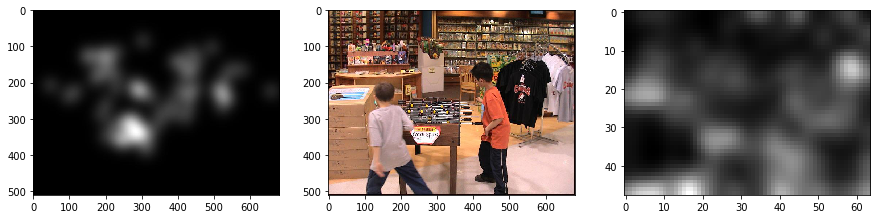

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(fix_map)
ax[1].imshow(img)
ax[2].imshow(sal_map);

## (1) Area Under the ROC Curve (AUC)

The ROC curve shows the performance of classifying pixels as fixated or non-fixated with different thresholds by looking at the true positive and false positive rate. 

Based on the implementation of Judd et al. 

To compare them, the images need to have the same size, so we resize the saliency map to the fixation map (according to MIT benchmark calculation).  Don't (down-)scale the fixation map to the saliency map, since the fixation map is binary here!

**Function documentation**:

Get all values of the saliency map that correctly predicted some fixation (disregarding the question how strong that fixation / saliency value is). With that, we also get the different thresholds for saliencies predicting fixation. We sort those and iterate over those thresholds, finding out how good they classify each the saliency of each pixel.

Loop over the thresholds, for each threshold compute:

$TP = \frac{\text{# correctly predicted fixation with this threshold}}{\text{# fixated pixels}}$

$FP = \frac{\text{# incorrectly predicted fixation with this threshold}}{\text{# not fixated pixels}}$

In [5]:
# create binary fixation
fix_binary = fix_map > 0

auc_score, tp, fp, thresholds = auc_judd_score(sal_map, fix_binary)

0.5411632631634629


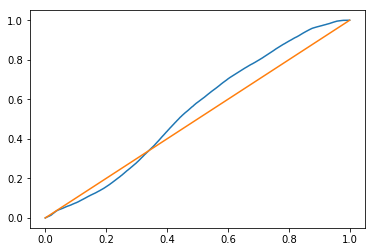

In [6]:
print(auc_score)

plt.plot(fp, tp)
plt.plot(np.arange(0, 1, 1/len(fp)), np.arange(0,1, 1/len(fp)));

## (2) NSS (Normalized Scanpath Saliency)

In [5]:
nss = compute_nss(sal_map, fix_binary)
print(nss)

0.015354130059723631


## (3) Similarity

Distribution-based metric, so the input is the continuous fixation map

In [5]:
sim_score = compute_similarity(sal_map, fix_map)
print(sim_score)

0.3312386880165913


## (4) Information Gain
Location-based metric, input is a binary fixation map. Computes the information gain of one model over a baseline (can also be another model) for the fixated pixels.

The saliency input maps have to be probability distributions, so we shift them to values > 0 and normalize them.

In [5]:
# create binary fixation
fix_binary = fix_map > 0

ig = compute_information_gain(sal_map, fix_binary)
print(ig)

-0.2764578470394656


---------------------------------------

In [4]:
nss, sim, info_gain, auc = compute_all_metrics(sal_map=sal_map, fix_map=fix_map, skip_auc = True)